Student id: m.kirankumar.2@gmail.com<br/>
Date: May 23, 2022

**7. For this problem, use the population dataset, and perform the following:**<br/>
1.	EDA on the time series to find trends and seasonality.<br/>
2.	Forecast the population on the given dataset for the next 6 months. 


In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

<p style="color:blue; ">Load popdata.csv into DataFrame<p/>

In [70]:
population = read_csv('popdata.csv')

<p style="color:blue; ">Population information of data<p/>

In [71]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   816 non-null    float64
 1   date    816 non-null    object 
dtypes: float64(1), object(1)
memory usage: 12.9+ KB


**date is of object/string type. Thus it requires to be type casted to pandas datatime**

In [72]:
population['date'] = pd.to_datetime(population['date'])
#also chaning default indexing to date
population = population.set_index('date')

In [73]:
population.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 816 entries, 1952-01-01 to 2019-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   816 non-null    float64
dtypes: float64(1)
memory usage: 12.8 KB


<p style="color:blue; ">Let's plot the Population value column graph<p/>

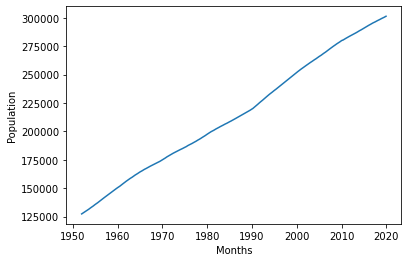

In [61]:
plt.plot(population)
plt.xlabel("Months")
plt.ylabel("Population")
plt.show()

<b>**Check No 1** <p style="color:red; ">Is Population data just a White Noise process?</p></b>

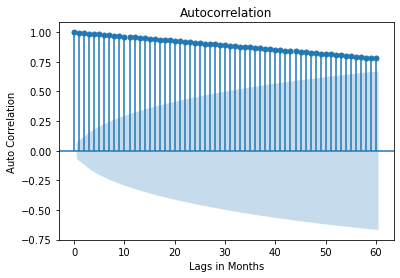

In [54]:
#checking for ACF for lag say about 60 (months)
sm.graphics.tsa.plot_acf(population, lags=60)
plt.xlabel('Lags in Months')
plt.ylabel("Auto Correlation")
plt.show()

For White Noise process, ACF falls abruptly falls to Zero. However the ACF here is not aburptly falling rather gradual(asymptotical). Therefore Population data is not driven by White Noise(fairly) | Thus there could be a possible predictability part of Data
<br/><br/>
**Inference** : Not a White Noise process | Further the data appears to be Non-Stationary in nature(visible)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 10)'>

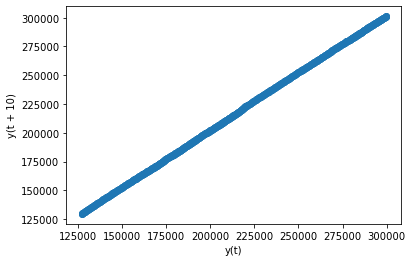

In [93]:
#Lag plot | for a wild guessed lag = 10
lag_plot(population, lag=10)

<b>**Check No 2** <p style="color:red; ">Is Population data Stationary?</p>

**Inference :** <p style="color:blue; "> At least, based on the above plot, average population (assuming that population is averaged for say 100 months as benchmark) Population is positively/linearly growing over years.<p/>
<br/>
Thus the Population data seems to be **Non-Stationary** . However it is better to check against a Statistical method

In [99]:
trend_output = seasonal_decompose(population, model='additive').trend
seasonal_output = seasonal_decompose(population, model='additive').seasonal
residual_output = seasonal_decompose(population, model='additive').resid

<p style="color:blue; ">Trend<p/>

<AxesSubplot:xlabel='date'>

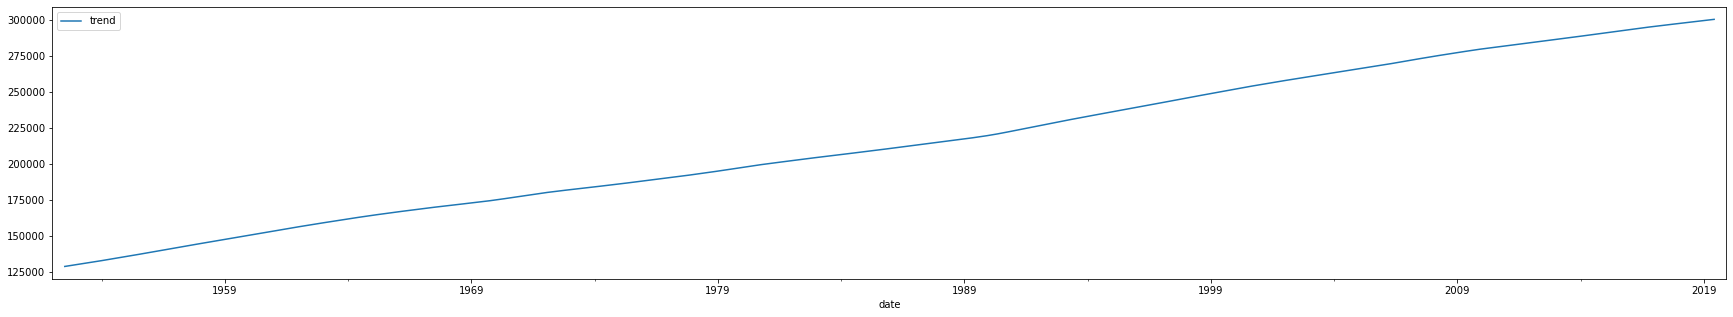

In [94]:
trend_output.plot(legend = True, figsize=(30, 5))

<p style="color:blue; ">Seasonality<p/>

<AxesSubplot:xlabel='date'>

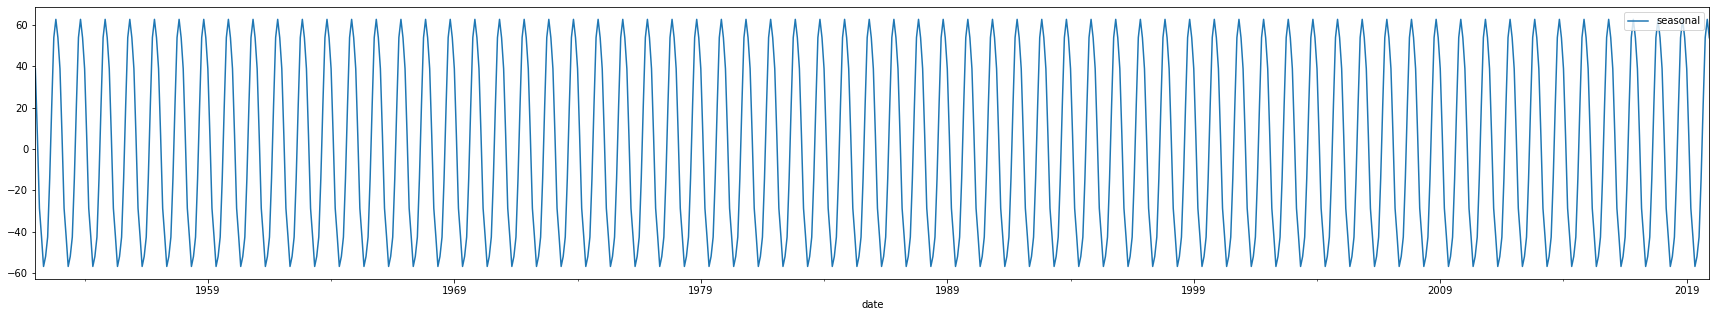

In [96]:
seasonal_output.plot(legend = True,figsize=(30, 5))

In [106]:
#residual_output.plot(legend = True,figsize=(30, 5))

For confirmity of population data being Non-Stationary, lets perform Dicky-Fuller test(Augumented Dicky-Fuller)

In [139]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tools.eval_measures import rmse

In [140]:
result = adfuller(population,autolag='AIC') 
print(f"ADF test result is \t: {result}")

ADF test result is 	: (-0.6653174109472528, 0.8555297779110393, 17, 798, {'1%': -3.4385711275998583, '5%': -2.8651686574447375, '10%': -2.568702230639255}, 6593.486797606457)


In [141]:
print(f"p-value is {result[1]:.2f}")

p-value is 0.86


**The P-value is 0.86 which is > 0.05. Thus Null-hypothesis test cannot be rejected that the population data set is Non-Stationary.**

https://www.geeksforgeeks.org/python-arima-model-for-time-series-forecasting/

https://en.wikipedia.org/wiki/Dickey%E2%80%93Fuller_test

https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test

https://medium.com/analytics-vidhya/time-series-prediction-with-machine-learning-getting-started-8763eda1127f

In [161]:
from statsmodels.graphics.tsaplots import plot_pacf

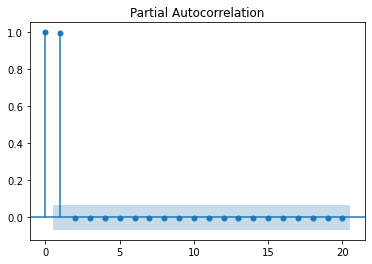

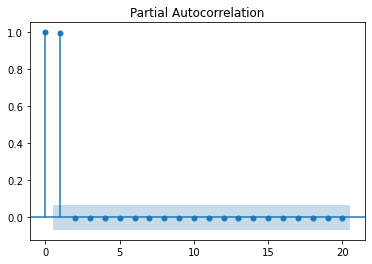

In [165]:
plot_pacf(population,lags=20)